###### Fakulta aplikovaných věd, Západočeská univerzita v Plzni, 2019

---

# Agent-based-modeling (ABM)

### Semestrální práce KMA/MM

__Anežka Švandová, Jan Půlpán__

# Úvod

Agent-based-modeling (ABM; česky multiagentní modelování), je metoda simulace chování "společenství", která narozdíl od modelování dynamických systémů pomocí diferenciálních rovnic nezkoumá jen klidové stavy, případně přechody mezi nimy, ale i vývoj celého systému, který ke klidovému stavu vůbec také nemusí vést. Nejen u agentích modelů často mluvíme o ekvilibriu, stavu kdy všichni agenti jsou ve vzájemné rovnováze.

- přidat že chování jednotlivce ovlivňuje celek

Agentem se rozumí samostatná entita, která má definované chovaní v závislosti na sousedních agentech, případně okolním prostředí.

Agenti jsou propojeni mezi sebou do sítě, velmi často ve formě mřížky, případně sítě malého světa, nebo náhodného grafu. (viz obr XYZ). Agenti, kteří v rámci sítě spolu sousedí, mohou interagovat. V některých modelech mohou agenti v rámci sítě i "cestovat" a měnit tak svoji polohu. 

ABM může vhodně doplňovat a ověřovat výsledky modelů, které lze řešit analyticky. Je vhodné pro situace, kdy nás zajímá vlastní dynamika systému, ověření kterého rovnovážného stavu dosahuje systém častěji apod. ABM lze také řešit systémy, které nemají ustálené stavy a nejdou tak řešit analyticky.

Konkrétní využití nachází ABM při modelování společenských jevů jako např. šíření informací nebo i virů, vývoj míry nezaměstnanosti, vývoj zaniklých civilizací. V biologii při modelování společenství hmyzu (např mravenců, včel), chování hejn ptáku atd. Firmy pomocí ABM mohou modelovat logistiku, spotřební trhy, zákaznické chování. Další využití je v ekonomii, dopravě nebo i armádě. My se budeme zabývat sociologickými modely, nejvíce pak modelem Roberta Axelroda, šíření kultur.

# Implementace

Obecný matematický postup, jak ABM řešit, bohužel neexistuje (několik pokusů si přesto ukážeme na konci této práce).  Chování modelu se tak nejčastěji zkoumá pomocí simulací, které ukazují chování modelu v čase. V případě ABM je přínosné sledovat i průběh simulace a tím vývoj celého systému. Výsledkem je tedy kromě případně dosaženého ekvilibria i průběh vlastní simulace. Konkrétní model se buď programuje "na zelené louce" nebo se využije jeden z dostupných frameworků (nějaké uvést).

Vlastní simulace probíhá v diskrétním čase, po jednotlivých iteracích. Síť, do ktré jsou agnti propojeni, je často reprezentována neorientovaným grafem, kdy vrcholy představují jednotlivé agenty a hrany pak jjich propojení. Nejjednoduším tvarem sítě je mřížka, která je velmi jednoduchá na implementaci a nevyžaduje takový výpočetní výkon. U sítě malého světa se pak toto velmi komplikuje.


NĚKAM VLOŽIT: ABM je častokrát popisováno jako časově-diskrétní dynamický systém na konečném stavovém prostoru (ať už deterministický, nbo stochastický.

Naše implementace je založena na jednoduchém modelu popsaném v článku (CITACE) Roberta Axelroda a implementována jednoduše jako jedna třída v Pythonu.



# Model šíření kultur

_"If people tend to become more alike in their beliefs, attitudes, and behavior when they interact, why do not all such a differences eventually dissapear?"_

V roce 1997 popsal Robert Axelrod [1] model šíření kultur (odkaz) kde se snaží odpovědět na otázku v podtitulu této kapitoly. Agenti v Axelrodově modelu jsou popsány seznamen vlastností (features), který tak stanovuje dimenzi kultury. Každá z vlastností má pak výčet možných hodnot (traits). Feature může být např jazyk, náboženství, styl oblékání apod. Později se ukázalo, že počet a hlavně vzájemný poměr mezi features a traits hrají velkou roli v tom, zda model dosáhne nebo nedosáhne equilibria.

Agenti jsou v Axelrodově modelu uspořádáni do pravidelné čtvercové mřížky, kromě krajních má tedy každý agent 4 sousedy. Agenti se v rámci sítě nepřemisťují, lze je tedy brát např. jako síť homogenních vesnic. 

Síť agentů se inicializuje náhodnými daty, každý agent je pak reprezentován vektorem features:

$$ X(x) = [X^1(x), X^2(x), \dots , X^F(x)] \;\text{ kde } X^i(x) \in \{1,2,\dots,q\} \;\text{ pro } i=1,2,\dots,F.$$

To, jak a jestli vůbec spolu budou 2 sousední agenti interagovat, je závislé na počtu společných features v poměru k počtu všech features. Tuto vlastnost můžeme popsat následující funkcí pro dva agenty $x$ a $y$:

$$ F(x,y) = \frac{1}{F} \sum_{i=1}^F \mathbb{1}\{X^i(x) = X^i(y)\}$$

Dva agenti spolu pak interagují s takovou pravděpodobností, jaké mají procento shodných features. Simulace probíhá v iteracích následujícího algoritmu:

Opakuj následující kroky tolikrát kolik je třeba.

- Krok 1: Vyber náhodně jednoho aktivního agenta a jednoho jeho náhodného souseda
- Krok 2: Agenti spolu interagují s pravděpodobností rovnou $F(x,y)$. Interakce probíhá tak, že soused předá aktivnímu agentovi jednu z vlastností, ve které se neshodují.

![AxelrodModel](axelrod_model_static.png "Axelrodův model")

Axelrod se snaží zodpovědět několik otázek. Jak se v modelu budou vyvíjet jednotlivé kultury? Dospěje model k jedné jednotné kultuře, nebo se vytvoří oddělené kulturní regiony? Ustálí se celý systém, a jestli ano, tak za jak dlouho?


Pár dalších poznámek:

- pročíst tohle: http://jasss.soc.surrey.ac.uk/12/1/6/appendixB/Axelrod1997.html
- model se dá interpretovat jako časově homogenní Markovův chain (pravděpodobnost přechodu z jednoho stavu do jiného nezávisí na čase) (https://cs.wikipedia.org/wiki/Markovův_řetězec)
- stav celého systému agntů se dá popsat polem $L \times L$ kde každý element reprezentuje jednoho agenta a jeho kulturní vektor. Celkové množství všech možných stavů je $q^{fL^2}$ kde $q$ je počet traits, $f$ je počet features a $L^2$ je počet agentů ve čtvercové mřížce (to číslo je strašně veliké - _uvést nějaký konkrétní příklad jak je velké_).
- matice pravděpdobnostního přechodu - přechod z jednoho stavu do druhého (matice takto veliká je poměrně problematická). 
- přechod mezi dvěma stavy $i$ a $j$ a jeho pravděpodobnost
    - pokud každý pár agentů má kulturní vektor se všemi sousedy buď kompletně shodný nebo úplně rozdílný, potom je stav $i$ absorbující a pravděpodobnost přechodu je $p_{i,i}=1$ a $p_{i,j}=0$
    - pokud existují alespoň 2 sousední agenti, kteří mají alespoň jednu feature shodnou, ale jejich kulturní vektor není identický, potom $p_{i,i} < 1$. Pokud vypočteme $p_{i,j}$, můžem snadno dopočítat i $p_{i,i}$, protože součet prvků na řádku matice pravděpodobnostního přchodu je roven $1$. Označme $H_{ij}$ je množiu agentů, sousedů agenta $k$, kteří mají trait, který $k$ převezme při přechodu ze stavu $i$ do stavu $j$. Označmě $h_{ij}$ kardinalitu množiny $H_{ij}$. Potom pro $p_{i,j}$, $i \neq j$ platí:
$$p_{i,j}=\frac{1}{L^2h_{i,j}} \sum_{reH_{ij}} \frac{n_{kr}}{f} \frac{1}{f-n_{kr}}$$. 

# Naše naprogramování modelu šíření kultur

Axelrod standardně ukazoval běh modelu na mřížkové struktuře. Náš model umožňuje kromě mřížky i strukturu malého světa, kdy každý agent je propojen na každé straně s 2 sousedy a navíc náhodně ještě s nějakým dalším agentem/agenty. Tímto se ale model velmi zkomplikoval a prodloužil se běh simulace, protože již nelze použít jednoduchou orientaci mezi agenty a celá struktura je mnohem pomalejší na přístup.

(těchto propojení je 120% agentů - možná by to taky mohl být parametr modelu)


Nejprve si ukážeme Jak vypadá jednoduchý model s mřížkou a 49 agenty (7x7).

__Poznámka:__

Naše implementace sítě agentů je značně pomalejší než ta, kterou mohl použít Axelrod. Je to dáno tím, že Axelrod počítal jen se sítí ve formě mřížky, kde lze sousedy snadno vyhledat (levý/pravý je index $-1$/$+1$, horní/dolní je index $-\sqrt(N)/\sqrt(N)$). Naše implenetace ale počítá s libovolnou síťí, která obsahuje i náhodná spojení. Její implementace ve formě řídkých matic (list listů, případně hash table hash table) je výpočetně náročná na čtení/zápis a hlavně na zjišťování konvergence.

V Axelrodově modelu se koncergence zjišťuje také ne na celém modelu, ale na základě toho, zda v 10 po sobě jdoucích interakcích proběhl nějaký update nebo ne.

- popsat jak model vytváříme: matice sousednosti + matice globalní similarity

V následujícím bloku jen importujeme všechny potřebné knihovny a také třídy Culture a Simulations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
#plt.rcParams['figure.figsize'] = [8, 8]

from culture import Culture, Simulation

Simulaci modelu si nejprve ukážeme na jednoduché mřížce $4 \times 4$ agentů. Každý z agentu má $F=5$ a každá s features nabývá jednu z $q=5$ možných traits. 

Po vytvoření sítě s agenty je na obrázku znázorněn graf se sítí agentů a iniciální stav glabal similarity. Čím je hrana grafu světlejší, tím je podobnost sousedních agentů menší. Pokud se agenti neshodují v žádné z features, není hrana zobrazena vůbec.

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 48
Počet propojení která mohou interagovat (0 < similarity < 1): 26
Počet komponent/kultur: 0

Maximální počet iterací: 50000




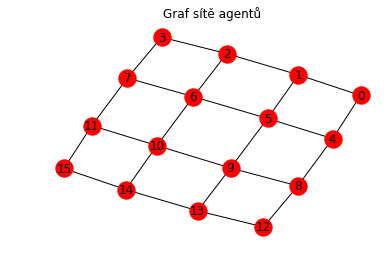

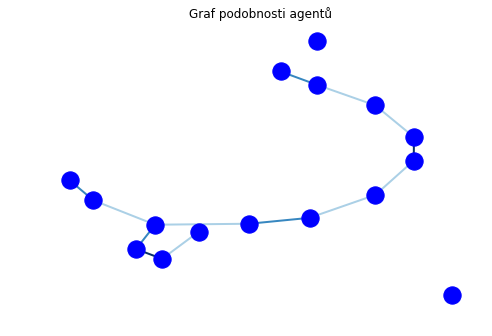

In [2]:
c1 = Culture(16, 1, 5, 5, 50000)
c1.analyze()
c1.plot_net()
c1.plot_gsnet()

Nyní pustíme na tomto jednoduchém modleu simulaci. Na následujících obrázcích je znázorněn průběh simulace.

In [3]:
c1.simulate(save_progress=200);

In [4]:
c1.analyze()

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 48
Počet propojení která mohou interagovat (0 < similarity < 1): 0
Počet komponent/kultur: 1

Maximální počet iterací: 50000
Model konvergoval v 577 iteracích




|200 iterací | 400 iterací|
|:---:|:---:|
|![alt](sim1_200.png) | ![alt](sim1_400.png)|

---

|600 iterací | 750 iterací|
|:---:|:---:|
|![alt](sim1_600.png) | ![alt](sim1_final.png)|


Stejnou simulaci provedeme pro síť malého světa za použití stejných parametrů. Pro názornost vypneme dodatešné náhodné spojení mezi agenty, abychom v grafem snadněni viděli dosaženou strukturu.

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 64
Počet propojení která mohou interagovat (0 < similarity < 1): 40
Počet komponent/kultur: 0

Maximální počet iterací: 50000




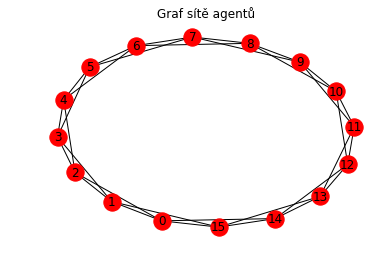

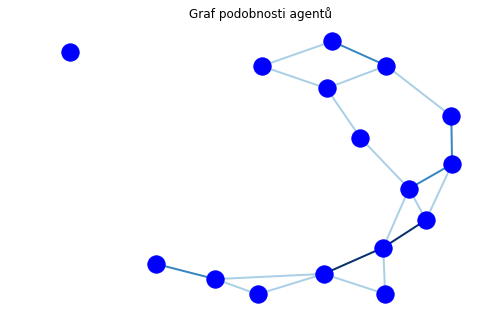

In [5]:
c1 = Culture(16, 0, 5, 5, 50000, random_con=False)
c1.analyze()
c1.plot_net()
c1.plot_gsnet()

In [32]:
c1.simulate(save_progress=200)
c1.analyze()

Počet agentů: 16 (f:5, t:5)
Počet všech propojení: 64
Počet propojení která mohou interagovat (0 < similarity < 1): 0
Počet komponent/kultur: 1

Maximální počet iterací: 50000
Model konvergoval v 594 iteracích




<Figure size 432x288 with 0 Axes>

|200 iterací | 400 iterací|
|:---:|:---:|
|![alt](sim0_200.png) | ![alt](sim0_400.png)|

---

|600 iterací | 750 iterací|
|:---:|:---:|
|![alt](sim0_600.png) | ![alt](sim0_final.png)|



# Výsledky

Výsledný parametr, který nás zajímá je, do kolika regionů (komponent grafu) společnost konvergovala. Protože je celý proces stochastický, provedeme větší počet simulací a ty potom budeme analyzovat.

In [2]:
s1 = Simulation(a_cnt=[25,],
                c_net=1,
               f_cnt=[2,6],
               t_cnt=[2,8],
               sim_cnt=5,
               maxiter=5000,
               file='test.csv')

In [4]:
%%time
s1.run_simulations()

Progress: [####################] 100.0%
CPU times: user 12.9 s, sys: 639 ms, total: 13.5 s
Wall time: 13.2 s


In [3]:
s1.regions_table()

regions     
traits         2    8
features             
2            2.4  9.2
6            1.0  1.0

In [4]:
s1.usediter_table()

usediter        
traits          2       8
features                 
2           196.8    79.4
6          1349.8  2370.8

In [18]:
del s1

Můžeme si vyzkoušet stejné modely, které ve svém článku testoval Axelrod. Nejprve pro mřížku.

In [9]:
s1 = Simulation(a_cnt=[100,],
                c_net=1,
               f_cnt=[5,10,15],
               t_cnt=[5,10,15],
               sim_cnt=10,
               maxiter=100000,
               file='axelrod.csv')

In [20]:
%%time
### Běží asi 1,5h
s1.run_simulations()

Progress: [####################] 100.0%
CPU times: user 4min 32s, sys: 2.72 s, total: 4min 35s
Wall time: 4min 33s


Jak vypadá závislost počtu regionů na počtu features a traits?

In [10]:
s1.regions_table(100)

In [15]:
del s1


To samé pro malý svět.

In [16]:
s1 = Simulation(a_cnt=[100,],
                c_net=0,
               f_cnt=[5,10,15],
               t_cnt=[5,10,15],
               sim_cnt=10,
               maxiter=100000,
               file='axelrod_small_world.csv')

In [17]:
%%time
### Běží asi 1,5h
s1.run_simulations()

Progress: [####################] 100.0%
CPU times: user 1h 35min 56s, sys: 25.2 s, total: 1h 36min 21s
Wall time: 3h 19min 46s


In [18]:
s1.regions_table(100)

In [ ]:
%%time

#### tohle je velkej model 100x100 agentů v mřížce
#### ještě jsem ho nepustil a možá nebude ani třeba

c1 = Culture(10000, 1, 2, 5, 3000000)
c1.simulate()
c1.analyze()

Axelrod ve svém článku ukazuje funkci závislosti počtu stabilních regionů na velikosti teritoria (počtu agentů). My jsme díky omeznému výpočetnímu výkonu nemohli udělat stejné testy, provedli jsme je tedy na menším vzorku. Výsledky jsou přesto obdobné.

In [7]:
s1 = Simulation(a_cnt=[25, 36, 49, 100, 144, 225],
                c_net=1,
               f_cnt=[2, 6, 10],
               t_cnt=[2, 6, 10, 14, 18],
               sim_cnt=5,
               maxiter=500000,
               file='simulations_grid.csv')

In [16]:
%%time

#### Pozor, běží 12 hodin!!!!!
s1.run_simulations()

Progress: [####################] 100.0%
CPU times: user 14h 5min 38s, sys: 10min 5s, total: 14h 15min 43s
Wall time: 21h 26min 1s


Ná následujícím grafu je zobrazena závislost průměrného počtu stabilních regionů, na velikosti sítě pro malý svět. Každá similace byla proveda 5 krát se stejnými parametry a výsledek je zobrazen v grafu. Z něj je patrné, že s zvětšující se sítí se počet stabilních regionů zmenšuje.

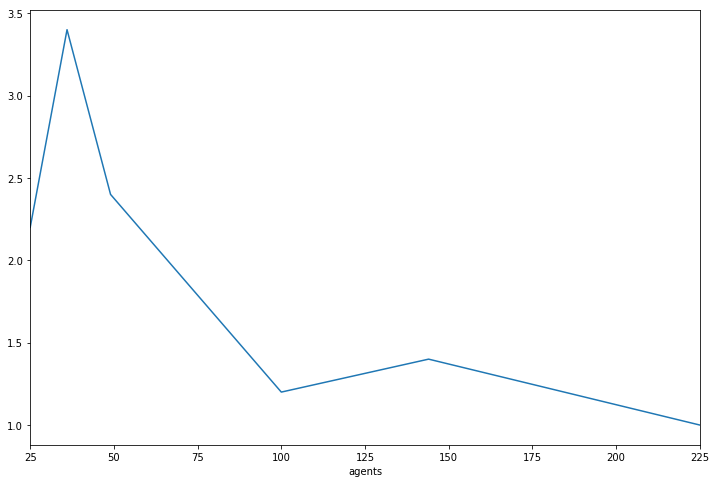

In [30]:
plt.rcParams['figure.figsize'] = [12, 8]
s1.agents_regs_plot(6,14)

In [8]:
s1.regions_table(100)

Kvůli použité implementaci sítě jsme nemohli na hw, který jsme měli k dispozici, ověřit stejný model, jako ve svém článku použil Axelrod. Přesto jsou naše výsledky velmi podobné.

![Axelrod](axelrod_territory_regions.png "Title")

In [ ]:
del s1

In [4]:
#pro velký úspěch to zkusíme vygnerovaj ještě pro malý svět

s1 = Simulation(a_cnt=[25, 36, 49, 100, 144, 225],
                c_net=0,
               f_cnt=[2, 6, 10],
               t_cnt=[2, 6, 10, 14, 18],
               sim_cnt=5,
               maxiter=500000,
               file='simulations_small_world.csv')

#### Pozor, běží 12 hodin!!!!!
#s1.run_simulations()

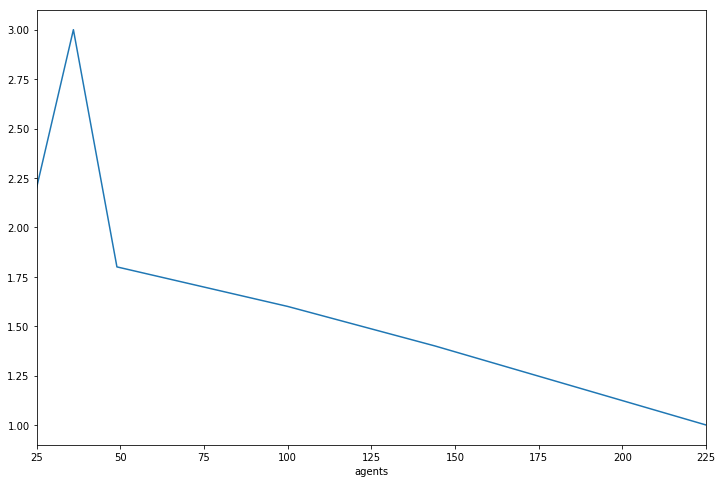

In [5]:
plt.rcParams['figure.figsize'] = [12, 8]
s1.agents_regs_plot(6,14)

In [6]:
s1.regions_table(100)

# Průběh simulace

_Na nějakém menším modelu ukázat i průběh celé simulace (něco jako ten animovanej gif). Axelrod popisuje zóny a regiony a vykresluje do grafu průběh takové simulace, viz str.218_

# Výsledky

Model ukazuje že rozdíly mezi jedinci nebo skupinami mohou být trvalejší, přes tendenci ke konvergenci. Předpoklad k tomuto chování je to, že příležitost k interakci a konvergence je proporcionálně úměrná k počtu sdílených features mezi sousedy.

Stupeň polarizace je vyjádřen počtem rozdílných kulturních regiónů v případě, že už žádná interakce není možná. Výsledky pak ukazují, že se polarizace zvětšuje pro kultury menší dimenze (méně features) s mnoha možnými hodnotami (traits). Oproti předchozím modelům stejného problému je rozdíl v tom, že tyto uvažovali jednotlivé features buď jako spojitou veličinu, nebo naopak jako binární (pouze 2 možnosti). Oba takové modely konvergují k equilibriu, kdy buď celá společnost má shodné vlastnosti a tvoří tak jedinou kulturu, nebo maximálně 2. Abychom zachovali kulturní rozmanitost, musí mít kultura více vlastností a každá z nich více než dvě hodnoty.

Takový model pak ilustruje následující závěry:

- lokální konvergence může vést ke globální polarizaci
- jak tohle přeložit? viz str 223
- i jednoduchá změna parametrů může znamenat neintiutivní výsledky. V našem modelu je to ukázáno na tom, kdy velké spolčnosti generují překvapivě malou polarizaci.


# Algebraizace modelu


- Markovův řetězec - vysvětlit - neefektivnost - (https://cs.wikipedia.org/wiki/Markovův_řetězec)



Neexistuje standard, podle kterého bychom ABM mohli popsat matematicky, většinou s modely studují pomocí simulací. Ty jsou velmi efektivní pro malé modely, pro velké je to již problmatické kvůli výpočetní výkonosti. Grimm a kol. navrhli ODD protocol (Overview, Design concepts, Details), který takové modely umí popsat. Na základě tohoto popisu navrhl kolektiv (citát) rozšíření nad ODD protokol, které deterministické ABM umí popsat jako časově-diskrétní dynamické systémy s algebraickou strukturou na konečných stavovém prostoru. V takovémto modleu lze řešit stabilní stavy pomocí soustavy polynomiálních rovnic.

Stav systému může být popsán jako vektor hodnot, jeden pro každou modelovou proměnnou (agenta). Funkcí $f$ (deterministickou nebo stochastickou) pak definujeme přechod z jednoho stavu do druhého. Dynamika systému je definována iteracemi přes funkci $f$. ODD pak definuje standardní šablonu na spefikaci stavového prostoru a přechodové funkce $f$.

Jak získáme stavovový prostor? Potřebujeme takový, který splňuje axionmy sčítání a násobení, tak aby tvořil konečné těleso. Na jednoduchém boolovském prostoru to bude např. $\mathbb{F}_2 = \{0,1\}$.

Nechť jsou proměnné (agenti) $x_1,\dots,x_n$ takové, jejichž stav je z $\mathbb{F}$. Definujeme lokální přechodovou funkci $f_i : \mathbb{F^n} \longrightarrow \mathbb{F}$. Funkce je lokální,  protože vstupem jsou stavy sousedních agentů. Dynamický systém pak můžeme popsat funkcí $$f = (f_1,\dots,f_n): \mathbb{F^n} \longrightarrow \mathbb{F^n}.$$

Popis:

Stavové proměnné (agenti) $x_1,\dots,x_n$. nebere v tuto chvíli v úvahu žádné uspořádání do sítě, nebo groupování apod.

Každá stavová proměnná $x_i$ má množinu možných stavů $X$. Proto stav celého modelu  je popsán kartézským součinem $X = X_1 \times \dots \times X_n$.

Každé stavové proměnné $x_i$ je přiřazena konečná množina pravidel, jak mění svůj stav. A to pravidel deterministických, nebo stochastických.

Definujme funkci $f_i : X \longrightarrow X$ na změnu stavu jedné stavové proměnné. Celý model pak můžeme reprezentovat jako diskrétní dynamický systém pomocí vektorové funkce $f = (f_1, \dots ,f_n): X \longrightarrow X$. Pokud se nám podaří reprezentovat stavový prostor jako těleso, lze psát $$f = (f_1,\dots,f_n): \mathbb{F^n} \longrightarrow \mathbb{F^n},$$ kde všechny $f_i \in \mathbb{F}[x_1, \dots , x_n]$ jsou polynomy. 

Co jsm tedy dosáhli:

- modely jsou popsány matematicky
- modely můžeme řešit pomocí standardních algebraických nástrojů (polynomiální rovnic)
- modely můžeme snadno porovnávat

I když jde poměrně velká část ABM modelů řešit tímto způsobem, záleží hodně na velikosti sítě, komplexnosti přechodové funkce $f$ a v neposlední řadě i výkonosti dostupného hardwaru, jestli jsme schopni model "upočítat". Nové postupy v řešení soustavy polynomiálních rovnic tomu napomáhají.

__Příklad: Conway's Game of Life__

Máme čtvercovou síť (mřížku) buňek (agentů), které nabývají jednoho ze dvou stavů. Buď LIVE (1) nebo DEAD (0). Každá buňka má 8 sousedů (vlevo/vpravo, nahoře/dol, diagonálně). Model se řídí následujícími pravidly:

1. každá živá buňka s méně než 2 živými sousedy umírá
2. každá živá buňka s více než 3 živými sousedy umírá
3. každá živá buňka s 2 nebo 3 živými sousedy zůstává naživu
4. každá mrtvá buňka s přesně 3 živými sousedy obživne

Protož máme jen 2 možné stavy, lze stavový prostor popsat velmi snadno jako $\mathbb{F}_2$. Každý agent $x$ má 8 sousedů $x_1, \dots, x_8$. Můžeme proto definovat funkci 
$$f_x(x,x_1,\dots,x_8)= \begin{cases} 0 : \sum x_i < 2 \\ 0 : \sum x_i = 2 \text{ a } x = 0 \\ 1 : \sum x_i = 2 \text{ a } x = 1 \\ 1 : \sum x_i = 3 \\ 0 : \sum x_i > 3\end{cases}.$$

Algebraický model pro Game of Life má pak tvar 
$$f = (f, \dots, f_{n \times n}):\mathbb{F}_2^{n \times n} \longrightarrow \mathbb{F}_2^{n \times n},$$
$$x_i \mapsto f_i(x_1, \dots, x_{n \times n}),$$
kde $n$ je dimenze čvercové mříčky. Abychom našli všechny stabilní stavy modelu, můsíme vyřešit soustavu polynomiálních rovnic
$$f_i(x) - x_i = 0, \; i=1\dots n \times n.$$

Na mřížce $4 \times 4$ je celkem $2^{16} = 65536$ stavů. model je posán 16 rovnicemi. To lze vyřšit poměrně snadno. Pro větší mřížky stavový prostor rychle narůstá a stejně tak i počet rovnic.

# Ukázat něco v Mesa ???

Možná bychom mohli jen ukázat tutorial od Mesa, jak se to taky můž dělat jinak.


# Poznámky

_Pro každej model ukázat strukturu, pak algoritmus řešení, nějaké vzorečky (pokud existují) na konvergenci a nakonec nějaké výsledky._

_Obecné otázky:_

- _pro jak velké modely (počet agentů) je ABM vhodné?_
- _jak řešit větší modely?_



# Literatura

[1] Axelrod R, (1997) The dissemination of culture - A model with local	convergence and global polarization. Journal of Conflict Resolution 41(2), pp. 203-226.

[2] Watts, D., Strogatz, S. (1998) Collective dynamics of ‘small-world’ networks. Nature 393, 440–442  doi:10.1038/30918